# Rf 7 0 2_Efficiencyfit_ 2 D

Special p.d.f.'s: unbinned maximum likelihood fit of an efficiency eff(x) function
to a dataset D(x,cut), cut is a category encoding a selection whose efficiency as function of x should be described by eff(x)




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:01 AM.</small></i>

In [1]:
import ROOT


flat = ROOT.kFALSE

Welcome to JupyROOT 6.18/03


Construct efficiency function e(x,y)
-----------------------------------------------------------------------

Declare variables x,mean, with associated name, title, value and allowed
range

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)
y = ROOT.RooRealVar("y", "y", -10, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Efficiency function eff(x;a,b)

In [3]:
ax = ROOT.RooRealVar("ax", "ay", 0.6, 0, 1)
bx = ROOT.RooRealVar("bx", "by", 5)
cx = ROOT.RooRealVar("cx", "cy", -1, -10, 10)

ay = ROOT.RooRealVar("ay", "ay", 0.2, 0, 1)
by = ROOT.RooRealVar("by", "by", 5)
cy = ROOT.RooRealVar("cy", "cy", -1, -10, 10)

effFunc = ROOT.RooFormulaVar(
    "effFunc",
    "((1-ax)+ax*cos((x-cx)/bx))*((1-ay)+ay*cos((y-cy)/by))",
    ROOT.RooArgList(
        ax,
        bx,
        cx,
        x,
        ay,
        by,
        cy,
        y))

Acceptance state cut (1 or 0)

In [4]:
cut = ROOT.RooCategory("cut", "cutr")
cut.defineType("accept", 1)
cut.defineType("reject", 0)

False

Construct conditional efficiency pdf E(cut|x,y)
---------------------------------------------------------------------------------------------

Construct efficiency p.d.f eff(cut|x)

In [5]:
effPdf = ROOT.RooEfficiency("effPdf", "effPdf", effFunc, cut, "accept")

Generate data(x,y,cut) from a toy model
-------------------------------------------------------------------------------

Construct global shape p.d.f shape(x) and product model(x,cut) = eff(cut|x)*shape(x)
(These are _only_ needed to generate some toy MC here to be used later)

In [6]:
shapePdfX = ROOT.RooPolynomial(
    "shapePdfX", "shapePdfX", x, ROOT.RooArgList(
        ROOT.RooFit.RooConst(
            0 if flat else -0.095)))
shapePdfY = ROOT.RooPolynomial(
    "shapePdfY", "shapePdfY", y, ROOT.RooArgList(
        ROOT.RooFit.RooConst(
            0 if flat else +0.095)))
shapePdf = ROOT.RooProdPdf(
    "shapePdf",
    "shapePdf",
    ROOT.RooArgList(
        shapePdfX,
        shapePdfY))
model = ROOT.RooProdPdf(
    "model",
    "model",
    ROOT.RooArgSet(shapePdf),
    ROOT.RooFit.Conditional(
        ROOT.RooArgSet(effPdf),
        ROOT.RooArgSet(cut)))

Generate some toy data from model

In [7]:
data = model.generate(ROOT.RooArgSet(x, y, cut), 10000)

[#0] WARNING:Generation -- RooAcceptReject::ctor(effPdf_Int[]_Norm[cut]) WARNING: performing accept/reject sampling on a p.d.f in 2 dimensions without prior knowledge on maximum value of p.d.f. Determining maximum value by taking 200000 trial samples. If p.d.f contains sharp peaks smaller than average distance between trial sampling points these may be missed and p.d.f. may be sampled incorrectly.
[#0] WARNING:Generation -- RooAcceptReject::ctor(effPdf_Int[]_Norm[cut]): WARNING: 200000 trial samples requested by p.d.f for 2-dimensional accept/reject sampling, this may take some time


Fit conditional efficiency pdf to data
--------------------------------------------------------------------------

Fit conditional efficiency p.d.f to data

In [8]:
effPdf.fitTo(data, ROOT.RooFit.ConditionalObservables(ROOT.RooArgSet(x, y)))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 ax           6.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 ay           2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 cx          -1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     4 cy          -1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FC

Plot fitted, data efficiency
--------------------------------------------------------

Make 2D histograms of all data, data and efficiency function

In [9]:
hh_data_all = ROOT.RooAbsData.createHistogram(
    data, "hh_data_all", x, ROOT.RooFit.Binning(8), ROOT.RooFit.YVar(
        y, ROOT.RooFit.Binning(8)))
hh_data_sel = ROOT.RooAbsData.createHistogram(
    data, "hh_data_sel", x, ROOT.RooFit.Binning(8), ROOT.RooFit.YVar(
        y, ROOT.RooFit.Binning(8)), ROOT.RooFit.Cut("cut==cut::accept"))
hh_eff = effFunc.createHistogram(
    "hh_eff", x, ROOT.RooFit.Binning(
        50), ROOT.RooFit.YVar(y, ROOT.RooFit.Binning(50)))

[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(effFunc) WARNING extended mode requested for a non-pdf object, ignored


Some adjustsment for good visualization

In [10]:
hh_data_all.SetMinimum(0)
hh_data_sel.SetMinimum(0)
hh_eff.SetMinimum(0)
hh_eff.SetLineColor(ROOT.kBlue)

Draw all frames on a canvas

In [11]:
ca = ROOT.TCanvas("rf702_efficiency_2D", "rf702_efficiency_2D", 1200, 400)
ca.Divide(3)
ca.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
hh_data_all.GetZaxis().SetTitleOffset(1.8)
hh_data_all.Draw("lego")
ca.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
hh_data_sel.GetZaxis().SetTitleOffset(1.8)
hh_data_sel.Draw("lego")
ca.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
hh_eff.GetZaxis().SetTitleOffset(1.8)
hh_eff.Draw("surf")

ca.SaveAs("rf702_efficiency_2D.png")

Info in <TCanvas::Print>: png file rf702_efficiency_2D.png has been created


Draw all canvases 

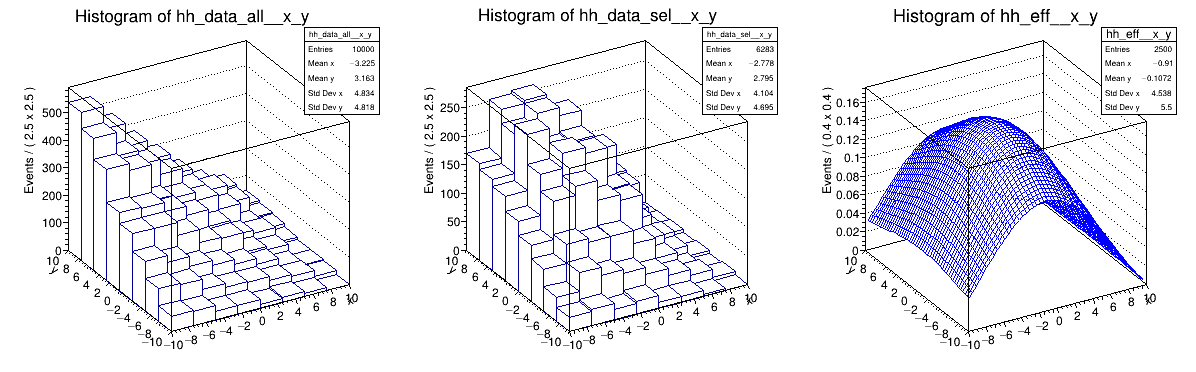

In [12]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()